# Getting started

Once you've chosen your scenario, download the data from [the Iowa website](https://data.iowa.gov/Economy/Iowa-Liquor-Sales/m3tr-qhgy) in csv format. Start by loading the data with pandas. You may need to parse the date columns appropriately.

## Importing Dataset and Data Munging

In [154]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
## Load the data into a DataFrame
df = pd.read_csv('../Resources/Iowa_Liquor_sales_sample_10pct_train.csv')

### Filling in missing values in County Names

In [155]:
#fixing missing county names
cc = df.set_index('City')['County'].to_frame()
cc.dropna(inplace=True)
undefined = pd.DataFrame([['Wayne'],['Polk'],['Fremont']], columns=['County'], index=['SEYMOUR', 'RUNNELLS', 'TABOR'])
df2 = pd.concat([cc, undefined])

def get_county(city):
    return df2.T[city].values[0][0]


In [156]:
citys_wo_county = df[pd.isnull(df["County"])]["City"].to_frame()
for row in citys_wo_county.index:
    df.set_value(row, 'County', get_county(citys_wo_county.ix[row]['City']))

In [526]:
#fixing spelling errors
train['City'] = train['City'].apply(lambda x: x.replace('MOUNT PLEASANT','MT PLEASANT'))
train['City'] = train['City'].apply(lambda x: x.replace('OTTUWMA','OTTUMWA'))
train['City'] = train['City'].apply(lambda x: x.replace('MOUNT VERNON','MT VERNON'))
train['City'] = train['City'].apply(lambda x: x.replace('ARNOLDS PARK','ARNOLD\'S PARK'))
train['City'] = train['City'].apply(lambda x: x.replace('LEMARS','LE MARS'))
train['City'] = train['City'].apply(lambda x: x.replace('LECLAIRE','LE CLAIRE'))
train['City'] = train['City'].apply(lambda x: x.replace('DEWITT','DE WITT'))
train['City'] = train['City'].apply(lambda x: x.replace('GUTTENBURG','GUTTENBERG'))
#train['City'] = train['City'].apply(lambda x: x.replace('JEWELL JUNCTION JUNCTION','JEWELL JUNCTION'))
#train['City'] = train['City'].apply(lambda x: x.replace('KELLOG','KELLOGG'))
train['City'] = train['City'].apply(lambda x: x.replace('KELLOGGG','KELLOGG'))


In [162]:
df[(df['County']=='W') | (df['County']=='P') | (df['County']=='F')]

,Unnamed: 0,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)


In [161]:
df.ix[2073,'County'] = 'Wayne'
df.ix[5842,'County'] = 'Wayne'
df.ix[70366,'County'] = 'Wayne'
df.ix[72786,'County'] = 'Polk'
df.ix[73473,'County'] = 'Fremont'
df.ix[96871,'County'] = 'Wayne'
df.ix[104910,'County'] = 'Wayne'
df.ix[113314,'County'] = 'Polk'
df.ix[121184,'County'] = 'Polk'
df.ix[136231,'County'] = 'Wayne'
df.ix[139566,'County'] = 'Fremont'
df.ix[188113,'County'] = 'Fremont'

### Filling in missing values in Category Names

In [163]:
#fixing missing categories
cat = df.set_index('Category')['Category Name'].to_frame()
cat.dropna(inplace=True)
undefined_cats = pd.DataFrame([["Moonshine"],["Reposado"],["Vodka"],["Hennessy"],["Spiced Rum"],["Rum"],["Amaretto"],["Spirit"],["Moonshine"],["Moonshine"],["Rum"]], columns=['Category Name'], index=['1011700.0', '1022200.0', '1032100.0', '1052100.0', '1062400.0', '1062500.0', '1082100.0', '1082200.0', '1091100.0', '1091300.0', '1092100.0'])
all_cats = pd.concat([cat, undefined_cats])

def get_category_name(category):
    return all_cats.T[str(float(category))].values[0]

In [164]:
category_wo_name = df[pd.isnull(df["Category Name"])]["Category"].to_frame()

for row in category_wo_name.index:
    if not np.isnan(category_wo_name.ix[row]['Category']):
        df.set_value(row, 'Category Name', get_category_name(category_wo_name.ix[row]['Category']))

In [165]:
del df['County Number']
print df.shape

(243859, 18)


In [166]:
#converting to datetime
df["Date"] = pd.to_datetime(df["Date"])

In [167]:
del df['Category']

In [176]:
#removing $ and converting to float
df['State Bottle Cost'] = df['State Bottle Cost'].apply(lambda x: str(x).replace('$','')).astype(float)
df['State Bottle Retail'] = df['State Bottle Retail'].apply(lambda x: str(x).replace('$','')).astype(float)
df['Sale (Dollars)'] = df['Sale (Dollars)'].apply(lambda x: str(x).replace('$','')).astype(float)
df['City'] = df['City'].apply(lambda x: x.upper())

In [177]:
#only using the 2015 year data
df = df[df['Date'].dt.year == 2015]

### Creating Train/Test Split

In [222]:
df_y = df['Sale (Dollars)']
df_X = df.drop(["Sale (Dollars)"], axis=1)

In [223]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=.33)

#### Concatenating X_train and Y_train for Analysis

In [729]:
train = pd.concat([X_train,y_train],axis = 1)
test = pd.concat([X_test,y_test],axis = 1)

In [ ]:
#creating total cost column
tot_cost = train['Bottles Sold']*train['State Bottle Cost']
insert_totcost = train.columns.get_loc('Sale (Dollars)') + 1
train.insert(insert_totcost,'Total_Cost',tot_cost)

# Explore the data

Perform some exploratory statistical analysis and make some plots, such as histograms of transaction totals, bottles sold, etc.

In [329]:
train.head()

,Unnamed: 0,Date,Store Number,City,Zip Code,County,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Volume Sold (Liters),Volume Sold (Gallons),Sale (Dollars),Total_Cost
2401,208630,2015-01-20,4895,CEDAR RAPIDS,52402,Linn,AMERICAN GRAPE BRANDIES,115,53218,Paul Masson Grande Amber Brandy,1750,12.00,18.00,6,10.5,2.77,108.00,72.00
35048,213743,2015-05-22,3162,MUSCATINE,52761,Muscatine,100 PROOF VODKA,300,36886,Mccormick Vodka,750,3.31,4.97,12,9.0,2.38,59.64,39.72
65597,188624,2015-10-14,4568,SIOUX CITY,51108,Woodbury,CREAM LIQUEURS,305,73051,Rumchata Mini,500,8.87,13.31,6,3.0,0.79,79.86,53.22
240283,129788,2015-10-20,2592,MARSHALLTOWN,50158,Marshall,CANADIAN WHISKIES,115,11774,Black Velvet,375,3.07,4.61,4,1.5,0.40,18.44,12.28
129227,48509,2015-05-13,2505,BOONE,50036,Boone,CANADIAN WHISKIES,55,12404,Canadian Ltd Whisky,375,2.05,3.08,24,9.0,2.38,73.92,49.20


In [554]:
train.describe()

,Unnamed: 0,Store Number,Vendor Number,Item Number,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Volume Sold (Liters),Volume Sold (Gallons),Sale (Dollars),Total_Cost
count,131831.000000,131831.000000,131831.000000,131831.000000,131831.000000,131831.000000,131831.000000,131831.000000,131831.000000,131831.000000,131831.000000,131831.000000
mean,135360.887371,3578.526394,255.713489,45925.667878,926.363860,9.784153,14.694196,9.962255,9.124323,2.410597,130.679780,86.968152
std,78208.695301,942.340233,141.603410,52160.286409,492.742095,7.166963,10.749908,25.234265,30.448640,8.043672,388.087399,257.629855
min,0.000000,2106.000000,10.000000,173.000000,50.000000,0.890000,1.340000,1.000000,0.100000,0.030000,1.340000,0.890000
25%,67726.500000,2603.000000,115.000000,26828.000000,750.000000,5.510000,8.270000,2.000000,1.600000,0.420000,30.500000,20.310000
50%,135064.000000,3713.000000,260.000000,38176.000000,750.000000,8.070000,12.300000,6.000000,5.250000,1.390000,70.560000,47.040000
75%,203086.500000,4349.000000,380.000000,64573.000000,1000.000000,11.920000,17.880000,12.000000,10.500000,2.770000,135.240000,90.120000
max,270954.000000,9013.000000,978.000000,995381.000000,6000.000000,425.000000,637.500000,2508.000000,2508.000000,662.540000,29327.760000,19551.840000


In [288]:
train[train['Bottles Sold'] < 26].describe()

,Unnamed: 0,Store Number,Vendor Number,Item Number,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Volume Sold (Liters),Volume Sold (Gallons),Sale (Dollars)
count,126622.000000,126622.000000,126622.00000,126622.000000,126622.000000,126622.000000,126622.000000,126622.000000,126622.000000,126622.000000,126622.000000
mean,135396.168810,3574.925819,255.74048,45955.553537,929.859732,9.855281,14.800806,7.208534,6.503885,1.718324,95.044645
std,78218.280152,939.605787,141.86241,51460.384476,490.818711,7.194565,10.791145,5.895200,5.783517,1.527906,93.409132
min,0.000000,2106.000000,10.00000,173.000000,50.000000,0.890000,1.340000,1.000000,0.100000,0.030000,1.340000
25%,67768.250000,2603.000000,115.00000,26828.000000,750.000000,5.705000,8.630000,2.000000,1.500000,0.400000,29.900000
50%,135067.500000,3713.000000,260.00000,38180.000000,750.000000,8.200000,12.300000,6.000000,4.500000,1.190000,67.395000
75%,203145.750000,4346.000000,380.00000,64711.000000,1000.000000,11.960000,17.940000,12.000000,10.500000,2.770000,129.600000
max,270954.000000,9010.000000,978.00000,995381.000000,6000.000000,425.000000,637.500000,25.000000,75.000000,19.810000,2434.560000


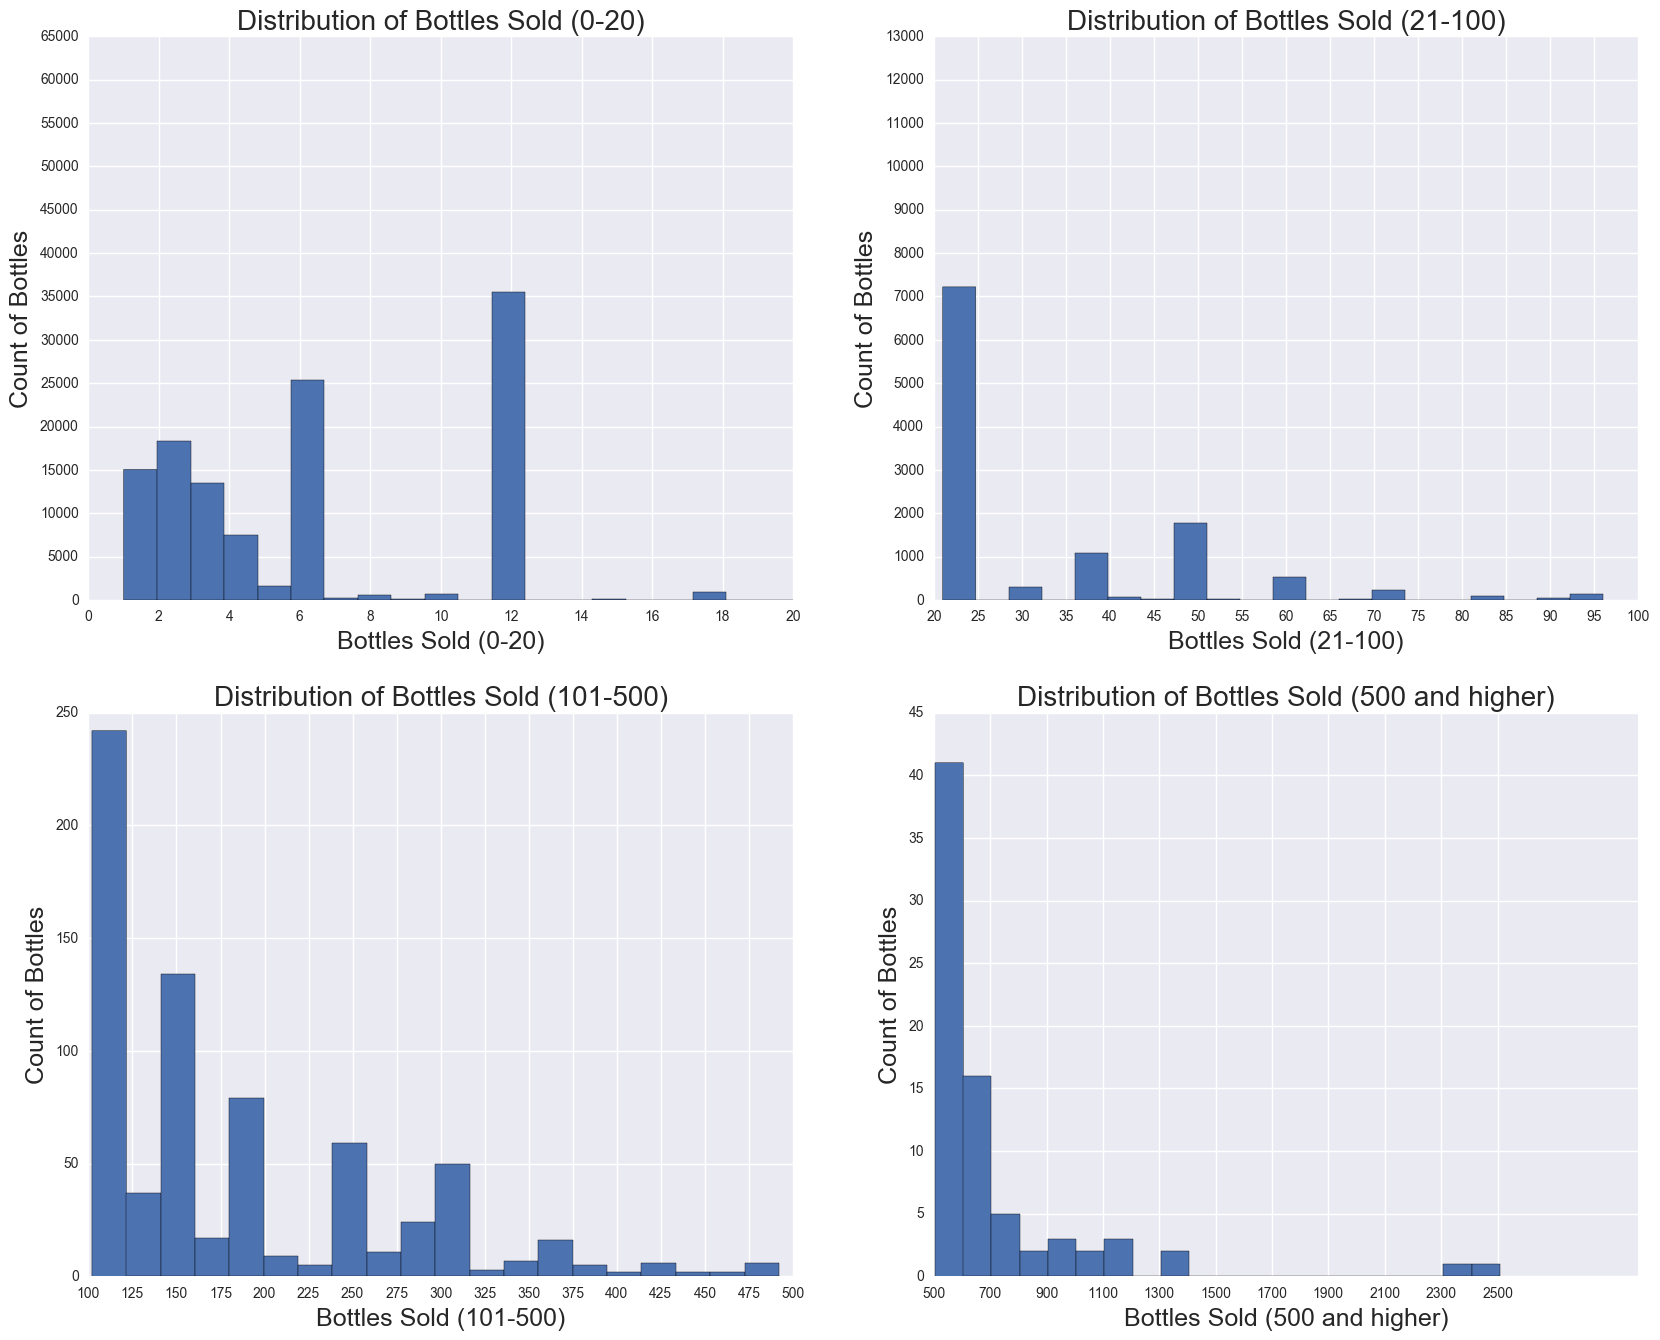

In [184]:
#evaluating bottles sold
fig, axes = plt.subplots(2,2, figsize=(20,16))
#Bottles Sold less than or equal to 10
axes[0][0].hist(x = train[X_train['Bottles Sold']<=20]['Bottles Sold'],bins = 20) 
axes[0][0].xaxis.set_ticks(np.arange(0, 21, 2))
axes[0][0].yaxis.set_ticks(np.arange(0, 70000, 5000))
axes[0][0].set_title('Distribution of Bottles Sold (0-20)',fontsize = 20)
axes[0][0].set_xlabel('Bottles Sold (0-20)',fontsize = 18)
axes[0][0].set_ylabel('Count of Bottles',fontsize = 18)
#Bottles Sold more than 10 and less than or equal to 100
axes[0][1].hist(x = train[(X_train['Bottles Sold']>20) & (train['Bottles Sold']<=100)]['Bottles Sold'],bins = 20)
axes[0][1].xaxis.set_ticks(np.arange(20, 101, 5))
axes[0][1].yaxis.set_ticks(np.arange(0, 14000, 1000))
axes[0][1].set_title('Distribution of Bottles Sold (21-100)',fontsize = 20)
axes[0][1].set_xlabel('Bottles Sold (21-100)',fontsize = 18)
axes[0][1].set_ylabel('Count of Bottles',fontsize = 18)
#Bottles Sold more than 100 and less than or equal to 500
axes[1][0].hist(x = train[(X_train['Bottles Sold']>100) & (train['Bottles Sold']<=500)]['Bottles Sold'],bins=20)
axes[1][0].xaxis.set_ticks(np.arange(100, 501, 25))
axes[1][0].set_title('Distribution of Bottles Sold (101-500)',fontsize = 20)
axes[1][0].set_xlabel('Bottles Sold (101-500)',fontsize = 18)
axes[1][0].set_ylabel('Count of Bottles',fontsize = 18)
#Bottles Sold more than 500 and less than or equal to 2700
axes[1][1].hist(x = train[(X_train['Bottles Sold']>500) & (train['Bottles Sold']<=2700)]['Bottles Sold'],bins = 20)
axes[1][1].xaxis.set_ticks(np.arange(500, 2700, 200))
axes[1][1].set_title('Distribution of Bottles Sold (500 and higher)',fontsize = 20)
axes[1][1].set_xlabel('Bottles Sold (500 and higher)',fontsize = 18)
axes[1][1].set_ylabel('Count of Bottles',fontsize = 18);

In [290]:
#make all category names upper case
#create category bins to be used for portfolio
train['Category Name'] = train['Category Name'].apply(lambda x: str(x).upper())
category = train.groupby('Category Name')['Item Number'].nunique().to_frame()
category.reset_index(inplace = True)
#creating category bins 
cat_bins = []
for x in train['Category Name']:
    if 'VODKA' in x:
        cat_bins.append('VODKA')
    elif 'WHISKEY' in x:
        cat_bins.append('WHISKEY')
    elif 'RUM' in x:
        cat_bins.append('RUM')
    elif 'SCHNAPPS' in x:
        cat_bins.append('SCHNAPPS')
    elif 'BRANDIES' in x:
        cat_bins.append('BRANDIES')    
    elif 'GIN' in x:
        cat_bins.append('GIN') 
    elif 'SCOTCH' in x:
        cat_bins.append('SCOTCH') 
    elif 'BOURBON' in x:
        cat_bins.append('BOURBON')
    elif 'AMARETTO' in x:
        cat_bins.append('AMARETTO')         
    elif 'TEQUILA' in x:
        cat_bins.append('TEQUILA') 
    else:
        cat_bins.append('OTHER')
cat_bin_df = pd.DataFrame(cat_bins)
cat_bin_df = cat_bin_df.rename(columns = {0:'Category_Bins'})


(1366, 2)
The mean # of unique items per store is 69.0131771596
The max # of unique items per store is 539
The min # of unique items per store is 1


,Store Number,Unique_Items
0,2106,189
1,2113,64
2,2130,148
3,2152,55
4,2178,117


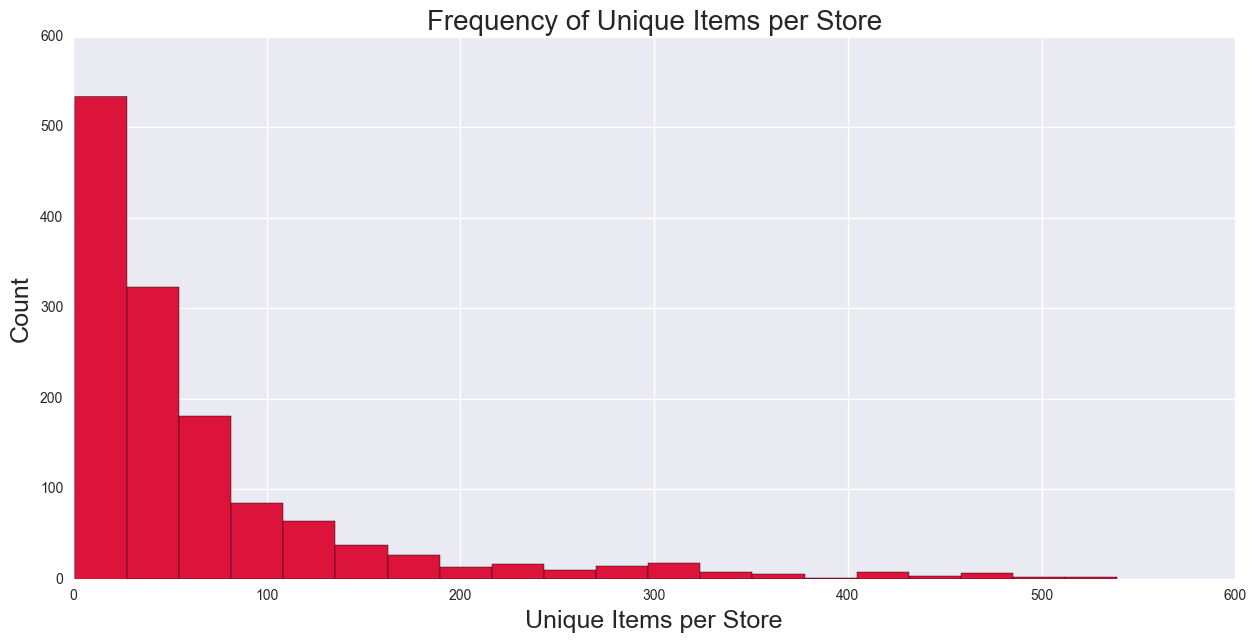

In [505]:
#creating unique items per store - possible proxy for sq footage given more items per store means a bigger store
#assumption is that that if an item did not sell, the business would remove them from the shelves, each business would maximize revenues
unique_items_per_store = train.groupby('Store Number')['Item Number'].nunique().to_frame('Unique_Items')
unique_items_per_store.reset_index(inplace = True)
unique_items_per_store.sort_values('Unique_Items',ascending = False)
print unique_items_per_store.shape
print "The mean # of unique items per store is", unique_items_per_store['Unique_Items'].mean()
print "The max # of unique items per store is", unique_items_per_store['Unique_Items'].max()
print "The min # of unique items per store is", unique_items_per_store['Unique_Items'].min()
unique_items_per_store['Unique_Items'].hist(bins = 20, figsize = (15,7), color = 'crimson')
plt.title('Frequency of Unique Items per Store',fontsize = 20)
plt.xlabel('Unique Items per Store',fontsize = 18)
plt.ylabel('Count',fontsize = 18)
unique_items_per_store.head()

In [579]:
verify = train[train['Bottles Sold'] < 26].groupby('City')['Bottles Sold'].sum().to_frame()
verify.reset_index(inplace = True)
verify = pd.merge(stores_per_city,verify,how='outer')
verify[verify['Bottles Sold'].isnull()]
train[train['City']=='CUMMING']
#CUMMING is the only city that gets removed when we limit to bottles sold < 26 per transaction
#considering there are only two transactions for CUMMING, we are okay with removing fron the analysis

,Unnamed: 0,Date,Store Number,City,Zip Code,County,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Volume Sold (Liters),Volume Sold (Gallons),Sale (Dollars),Total_Cost
189956,105091,2015-06-04,9013,CUMMING,50061,Warren,VODKA 80 PROOF,154,36447,Ingenioz,750,12.54,18.81,36,27.0,7.13,677.16,451.44
140109,100716,2015-12-01,9013,CUMMING,50061,Warren,BLENDED WHISKIES,154,27629,Prairie Fire,750,9.09,13.64,60,45.0,11.89,818.40,545.40


In [580]:
city_revenue = train[train['Bottles Sold'] < 26].groupby('City')[['Sale (Dollars)','Total_Cost']].sum()
city_revenue['Profit'] = city_revenue['Sale (Dollars)'] - city_revenue['Total_Cost']
city_revenue.reset_index(inplace = True)

In [ ]:
#creating stores per zip/city/county and county_df
stores_per_zip = train.groupby('Zip Code')['Store Number'].nunique().to_frame('Stores_per_zip')
stores_per_city = train.groupby('City')['Store Number'].nunique().to_frame('Stores_per_City')
stores_per_city.reset_index(inplace = True)
stores_per_county = train.groupby('County')['Store Number'].nunique().to_frame('Stores_per_County')
stores_per_county.reset_index(inplace = True)

In [606]:
county_store = train.groupby(['County','Store Number'])['Zip Code'].nunique().to_frame('Count')
county_store.reset_index(inplace = True)
county_items = pd.merge(county_store,unique_items_per_store,how= 'outer')
#this is the average unique items per store in the county. 
county_avgitems = county_items.groupby('County')['Unique_Items'].mean().to_frame('Avg_items_store')
county_avgitems.reset_index(inplace = True)
county_avgitems.head()

#creating city-store number pair and average items per store per city
city_store = train.groupby(['City','Store Number'])['Zip Code'].nunique().to_frame('Count')
city_store.reset_index(inplace = True)
city_items = pd.merge(city_store,unique_items_per_store)
city_avgitems = city_items.groupby('City')['Unique_Items'].mean().to_frame('Average_items_store')
city_avgitems.reset_index(inplace = True)
sales_per_store = train[train['Bottles Sold'] < 26].groupby('Store Number')['Sale (Dollars)'].sum().to_frame()
sales_per_store.reset_index(inplace = True)
sales_per_store.head()

,Store Number,Sale (Dollars)
0,2106,48831.17
1,2113,5317.85
2,2130,36091.69
3,2152,4847.63
4,2178,12940.28


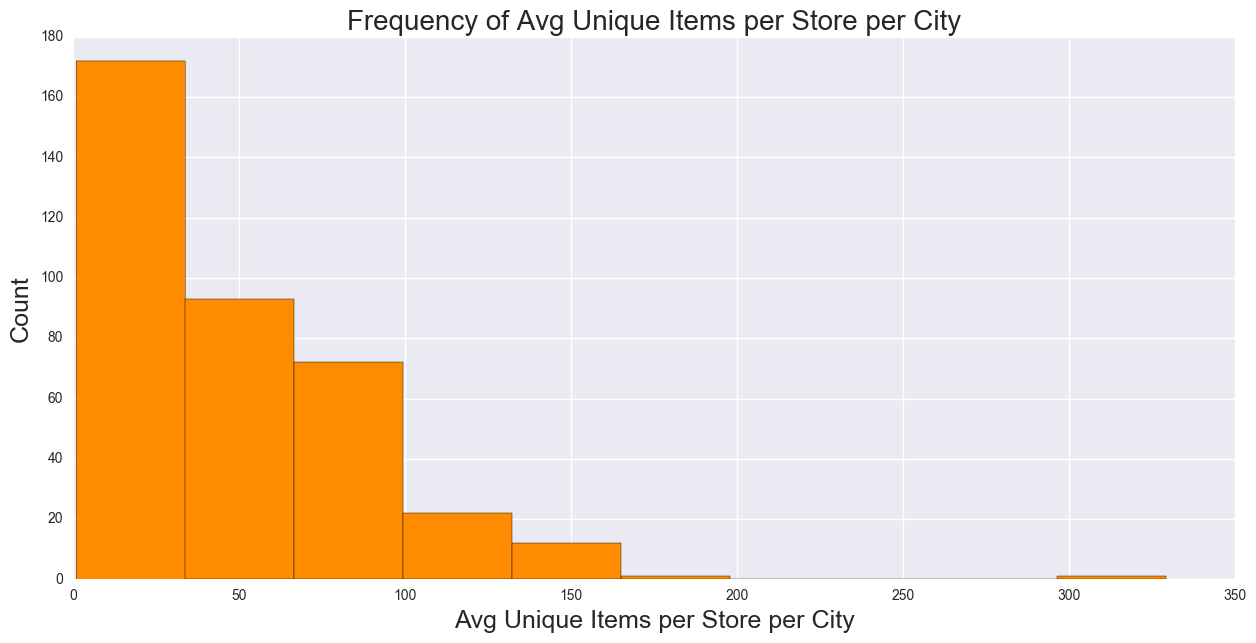

In [553]:
#county_avgitems.hist(figsize = (15,7), color = 'darkorange')
#plt.title('Frequency of Avg Unique Items per Store per County',fontsize = 20)
#plt.xlabel('Avg Unique Items per Store per County',fontsize = 18)
#plt.ylabel('Count',fontsize = 18)

city_avgitems.hist(figsize = (15,7), color = 'darkorange')
plt.title('Frequency of Avg Unique Items per Store per City',fontsize = 20)
plt.xlabel('Avg Unique Items per Store per City',fontsize = 18)
plt.ylabel('Count',fontsize = 18)

,City,Bottles Sold,Stores_per_City,Bottles_per_store,Avg_items_per_store,Population,Bottles_per_pop,Sale (Dollars),Total_Cost,Profit,Sales_per_bottle,Profit_per_bottle,Sales_per_Store,Pop_per_Store
10,ALTOONA,10785,9,1198.33,82,16984,0.64,115100.30,76625.62,38474.68,10.672258,3.567425,12788.922222,1887.111111
11,AMES,33446,25,1337.84,105,65060,0.51,329618.40,219452.17,110166.23,9.855241,3.293854,13184.736000,2602.400000
14,ANKENY,23363,21,1112.52,77,56764,0.41,217733.24,144940.89,72792.35,9.319575,3.115711,10368.249524,2703.047619
30,BETTENDORF,22108,12,1842.33,97,35505,0.62,214736.50,143020.23,71716.27,9.713068,3.243906,17894.708333,2958.750000
35,BOONE,6413,9,712.56,58,12692,0.51,69354.71,46163.02,23191.69,10.814706,3.616356,7706.078889,1410.222222
40,BURLINGTON,15349,14,1096.36,73,25410,0.60,160700.20,107038.48,53661.72,10.469750,3.496105,11478.585714,1815.000000
49,CEDAR FALLS,23990,17,1411.18,116,41255,0.58,236534.40,157447.24,79087.16,9.859708,3.296672,13913.788235,2426.764706
50,CEDAR RAPIDS,98038,74,1324.84,84,130405,0.75,791234.01,526881.09,264352.92,8.070687,2.696433,10692.351486,1762.229730
61,CLINTON,14696,10,1469.60,101,26064,0.56,152977.86,101874.02,51103.84,10.409490,3.477398,15297.786000,2606.400000
62,CLIVE,4051,10,405.10,38,17419,0.23,47286.48,31491.24,15795.24,11.672792,3.899097,4728.648000,1741.900000


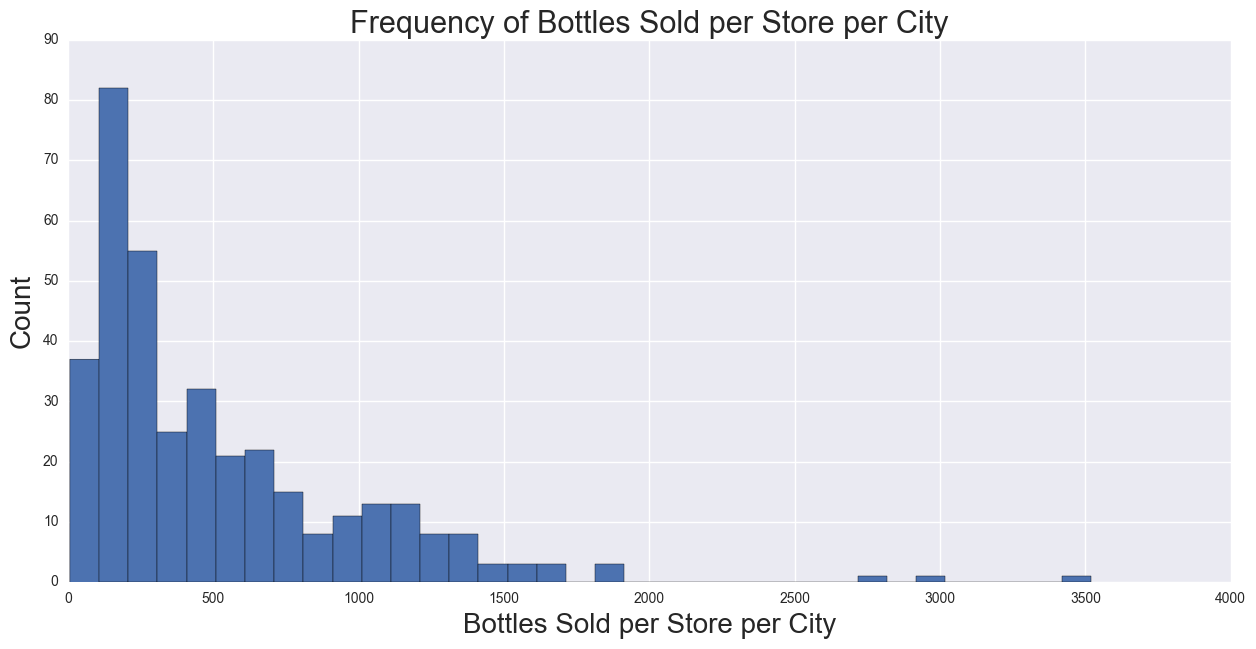

In [678]:
#bottles sold per store for 2015, grouping by city to limit the number of cities to consider
store_bottles = train.groupby(['Store Number','City'])['Bottles Sold'].sum().to_frame()
store_bottles.reset_index(inplace = True)
store_bottles_unique = pd.merge(store_bottles,unique_items_per_store)

city_metrics = store_bottles_unique.groupby('City')['Bottles Sold','Unique_Items'].sum()
city_metrics.reset_index(inplace = True)
city_metrics = pd.merge(city_metrics,stores_per_city)
city_metrics['Bottles_per_store'] = (city_metrics['Bottles Sold'] / city_metrics['Stores_per_City']).round(2)
city_metrics['Avg_items_per_store'] = (city_metrics['Unique_Items'] / city_metrics['Stores_per_City']).round(0).astype(int)

#reading in Iowa city population for 2014
city_pop_2015 = pd.read_csv('../Resources/IA_pop_2015.csv')
city_pop_2015['City'] = [x.upper() for x in city_pop_2015['City']]

city_metrics = pd.merge(city_metrics,city_pop_2015)
city_metrics['Bottles_per_pop'] = (city_metrics['Bottles Sold'] / city_metrics['Population']).round(2)
city_metrics = pd.merge(city_metrics,city_revenue)
del city_metrics['Unique_Items']
city_metrics['Sales_per_bottle'] = city_metrics['Sale (Dollars)'] / city_metrics['Bottles Sold']
city_metrics['Profit_per_bottle'] = city_metrics['Profit'] / city_metrics['Bottles Sold']
city_metrics['Sales_per_Store'] = city_metrics['Sale (Dollars)'] / city_metrics['Stores_per_City']
city_metrics['Pop_per_Store'] = city_metrics['Population'] / city_metrics['Stores_per_City']
city_metrics['Bottles_per_store'].hist(figsize = (15,7),bins = 35)
plt.title('Frequency of Bottles Sold per Store per City',fontsize = 22)
plt.xlabel('Bottles Sold per Store per City',fontsize = 20)
plt.ylabel('Count',fontsize = 20)
#cities where there is at least sales of $3500 per store. 
city_metrics[city_metrics['Sales_per_Store']>  3500]

city_y = city_metrics[(city_metrics['Sales_per_Store']>  3500) & (city_metrics['Population']>= 10000)].iloc[:,12]
city_X = city_metrics[(city_metrics['Sales_per_Store']>  3500) & (city_metrics['Population']>= 10000)].iloc[:,[2,4,6,13]]
city_metrics[(city_metrics['Sales_per_Store']>  3500) & (city_metrics['Population']>= 10000)]

In [679]:
city_X.columns

Index([u'Stores_per_City', u'Avg_items_per_store', u'Bottles_per_pop',
       u'Pop_per_Store'],
      dtype='object')

In [ ]:
from sklearn import linear_model
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.cross_validation import cross_val_predict,cross_val_score

Linear Regression r^2 between Actual y and Predicted y_hat : 0.880513063573
Linear Regression Coefficients are: [ -3.11638613e+01   4.44461838e+01   1.16411065e+04   3.33403839e+00]
Cross Validation Score of Linear Regression: [ 0.78171915  0.93116835  0.7214323   0.96112594  0.73510229]
Mean of 5 runs of Cross Validation Score of Linear Regression: 0.826109605142
r^2 between the Actual and Predicted for Cross Val Predict is: 0.848100245428


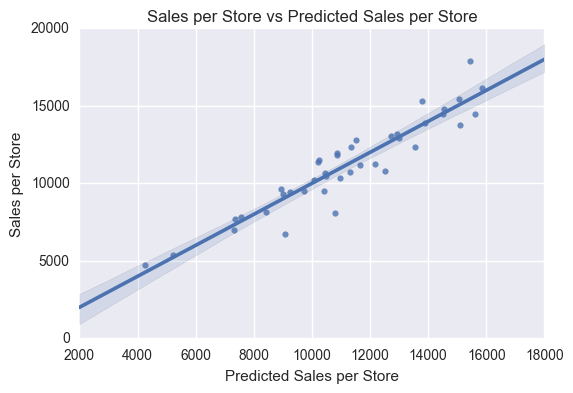

In [724]:
# import our estimator - Linear Regression
lr = linear_model.LinearRegression()
# fit our model using our data and target
lr_model = lr.fit(city_X, city_y)
lr_predict = lr.predict(city_X)
lr_r2 =  r2_score(y_true=city_y, y_pred=lr_predict)
print 'Linear Regression r^2 between Actual y and Predicted y_hat :',lr_r2
print 'Linear Regression Coefficients are:',lr_model.coef_
print 'Cross Validation Score of Linear Regression:',cross_val_score(lr, city_X, city_y, n_jobs=1, cv=5)
print 'Mean of 5 runs of Cross Validation Score of Linear Regression:',cross_val_score(lr, city_X, city_y, n_jobs=1, cv=5).mean()

cvp_lr_pred = cross_val_predict(lr_model,city_X,city_y,cv=5)
cvp_lr_r2 = r2_score(y_true = city_y,y_pred = cvp_lr_pred)
print 'r^2 between the Actual and Predicted for Cross Val Predict is:',cvp_lr_r2
ax = sns.regplot(lr_predict, city_y)
plt.ylabel('Sales per Store')
plt.ylim(0,20000)
plt.xlabel('Predicted Sales per Store')
plt.title('Sales per Store vs Predicted Sales per Store');

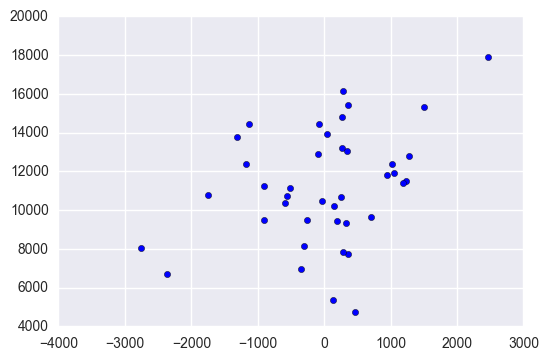

In [728]:
plt.scatter(city_y - lr_predict,city_y)

In [710]:
# import our estimator - RidgeCV Regression
rcv = linear_model.RidgeCV(alphas=
                           (.001, .001, .01, .1, .5, 1, 5, 10),
                           store_cv_values=True,
                          )

# fit the ridge cv model
rcv_model = rcv.fit(city_X, city_y)
rcv_r2 =  rcv_model.score(city_X, city_y)
print 'Ridge CV r^2 is:',rcv_r2
print 'The Ridge CV best alpha is:',rcv_model.alpha_
print 'The Ridge CV coefficients are:',rcv_model.coef_
print 'The mean of the coefficients are:',abs(rcv_model.coef_).mean()
print 'The Shape is:',rcv_model.cv_values_.shape
pd.DataFrame(rcv_model.cv_values_, columns=rcv.alphas).head(3)

cvp_rcv_preds = cross_val_predict(rcv_model, city_X, city_y, cv=5)
pd.DataFrame(cvp_rcv_preds, columns=['y_hat'])
cvp_rcv_r2 =  r2_score(y_true=city_y, y_pred=cvp_rcv_preds)
print 'r^2 between Actual and Predicted for Cross Validation Predict is:',cvp_rcv_r2

print 'Cross Validation Score:',cross_val_score(rcv, city_X, city_y, n_jobs=1, cv=5)
print 'Mean of 5 runs of Cross Validation Score:',cross_val_score(rcv, city_X, city_y, n_jobs=1, cv=5).mean()

Ridge CV r^2 is: 0.875089798834
The Ridge CV best alpha is: 0.1
The Ridge CV coefficients are: [ -2.32198017e+01   5.43730793e+01   9.72664621e+03   2.99742438e+00]
The mean of the coefficients are: 2451.80912792
The Shape is: (40, 8)
r^2 between Actual and Predicted for Cross Validation Predict is: 0.848185183655
Cross Validation Score: [ 0.77631342  0.91798756  0.72770383  0.94093224  0.7855756 ]
Mean of 5 runs of Cross Validation Score: 0.829702528103


The Average Sales/City where there is at least 1 Liquor or Grocery Store: $ 51079.2


,Liquor,Grocery,Other,Sale (Dollars)
City,,,,
DES MOINES,11,32,46,1162922.59
CEDAR RAPIDS,13,21,40,791234.01
DAVENPORT,10,12,20,519190.03
SIOUX CITY,3,11,20,420747.53
IOWA CITY,5,8,12,403202.29
COUNCIL BLUFFS,2,10,29,386740.05
WATERLOO,9,13,24,370596.36
WEST DES MOINES,2,10,18,358018.76
DUBUQUE,2,8,19,342095.34


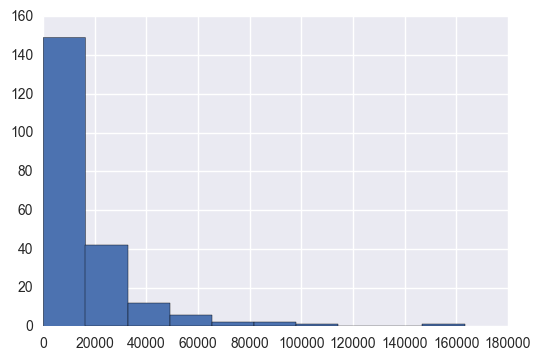

In [635]:

#categorizing each store number
store_names = pd.read_csv('../Resources/IA_Data_Stores.csv')
city_store = train.groupby(['Store Number','City'])['County'].nunique().to_frame()
city_store.reset_index(inplace = True)
total_citystore = pd.merge(city_store,store_names,on='Store Number')
store_type = []
liquor_list = []
grocery_list = []
other_list = []
for x in total_citystore['Store Name']:
    if ('liquor' or 'spirits' or 'wine') in x.lower():
        store_type.append('Liquor')
        liquor_list.append(1)
        grocery_list.append(0)
        other_list.append(0)
    elif ('spirits') in x.lower():
        store_type.append('Liquor')
        liquor_list.append(1)
        grocery_list.append(0)
        other_list.append(0)
    elif ('wine') in x.lower():
        store_type.append('Liquor')
        liquor_list.append(1)
        grocery_list.append(0)
        other_list.append(0)
    elif ('beverage') in x.lower():
        store_type.append('Liquor')
        liquor_list.append(1)
        grocery_list.append(0)
        other_list.append(0)
    elif ('bottle') in x.lower():
        store_type.append('Liquor')  
        liquor_list.append(1)
        grocery_list.append(0)
        other_list.append(0)
    elif ('vineyard') in x.lower():
        store_type.append('Liquor')
        liquor_list.append(1)
        grocery_list.append(0)
        other_list.append(0)
    elif ('beer') in x.lower():
        store_type.append('Liquor')
        liquor_list.append(1)
        grocery_list.append(0)
        other_list.append(0)
    elif ('cellar') in x.lower():
        store_type.append('Liquor')
        liquor_list.append(1)
        grocery_list.append(0)
        other_list.append(0)
    elif ('holler') in x.lower():
        store_type.append('Liquor')
        liquor_list.append(1)
        grocery_list.append(0)
        other_list.append(0)
    elif ('distribution') in x.lower():
        store_type.append('Liquor')
        liquor_list.append(1)
        grocery_list.append(0)
        other_list.append(0)
    elif ('central city') in x.lower():
        store_type.append('Liquor')
        liquor_list.append(1)
        grocery_list.append(0)
        other_list.append(0)
    elif ('distributing') in x.lower():
        store_type.append('Liquor')
        liquor_list.append(1)
        grocery_list.append(0)
        other_list.append(0)
    elif 'hy-vee' in x.lower():
        store_type.append('Grocery')
        liquor_list.append(0)
        grocery_list.append(1)
        other_list.append(0)
    elif 'fareway' in x.lower():
        store_type.append('Grocery')
        liquor_list.append(0)
        grocery_list.append(1)
        other_list.append(0)
    elif 'target'in x.lower():
        store_type.append('Grocery') 
        liquor_list.append(0)
        grocery_list.append(1)
        other_list.append(0)
    elif 'wal-mart' in x.lower():
        store_type.append('Grocery') 
        liquor_list.append(0)
        grocery_list.append(1)
        other_list.append(0)
    elif 'food' in x.lower():
        store_type.append('Grocery')
        liquor_list.append(0)
        grocery_list.append(1)
        other_list.append(0)
    elif 'supermarket' in x.lower():
        store_type.append('Grocery')           
        liquor_list.append(0)
        grocery_list.append(1)
        other_list.append(0)
    elif 'dahl\'s' in x.lower():
        store_type.append('Grocery')           
        liquor_list.append(0)
        grocery_list.append(1)
        other_list.append(0)        
    elif 'sam\'s club' in x.lower():
        store_type.append('Grocery')           
        liquor_list.append(0)
        grocery_list.append(1)
        other_list.append(0)       
    elif 'econ-o-mart' in x.lower():
        store_type.append('Grocery')           
        liquor_list.append(0)
        grocery_list.append(1)
        other_list.append(0)          
    elif 'super valu' in x.lower():
        store_type.append('Grocery')           
        liquor_list.append(0)
        grocery_list.append(1)
        other_list.append(0)
    elif 'shop n save' in x.lower():
        store_type.append('Grocery')           
        liquor_list.append(0)
        grocery_list.append(1)
        other_list.append(0)
    elif 'grocery' in x.lower():
        store_type.append('Grocery')           
        liquor_list.append(0)
        grocery_list.append(1)
        other_list.append(0)
    elif 'pantry' in x.lower():
        store_type.append('Grocery')           
        liquor_list.append(0)
        grocery_list.append(1)
        other_list.append(0)
    elif 'costco' in x.lower():
        store_type.append('Grocery')           
        liquor_list.append(0)
        grocery_list.append(1)
        other_list.append(0)
    elif 'price chopper' in x.lower():
        store_type.append('Grocery')           
        liquor_list.append(0)
        grocery_list.append(1)
        other_list.append(0)
    elif 'save a lot' in x.lower():
        store_type.append('Grocery')           
        liquor_list.append(0)
        grocery_list.append(1)
        other_list.append(0)
    else:
        store_type.append('Other')
        liquor_list.append(0)
        grocery_list.append(0)
        other_list.append(1)
total_citystore['Store Type'] = pd.Series(store_type)
total_citystore['Liquor'] = pd.Series(liquor_list)
total_citystore['Grocery'] = pd.Series(grocery_list)
total_citystore['Other'] = pd.Series(other_list)

total_citystore_merge = total_citystore.iloc[:,[0,1,3,4,5,6,7]]
store_type_sales = pd.merge(total_citystore,sales_per_store)
#liquor store type sales histogram
store_type_sales[store_type_sales['Store Type'] == 'Liquor']['Sale (Dollars)'].hist()
#groupby store type and evaluate metrics for each store type for the state of iowa
#liquor stores have higher mean liquor sales than groceries and convenience stores
#convenience stores might be the go to place for small rural towns
store_type_sales.groupby('Store Type')['Sale (Dollars)'].agg({sum,len,np.mean})

#what about cities where there are at least one liquor store or grocery stores
city_type_sales = store_type_sales.groupby('City')[['Liquor','Grocery','Other','Sale (Dollars)']].sum()
#the average sales per city where there is at least 1 grocery or 1 liquor store
mean_city_grocery_liquor = city_type_sales[(city_type_sales['Liquor']>0) |(city_type_sales['Grocery']>0)]['Sale (Dollars)'].mean()
print 'The Average Sales/City where there is at least 1 Liquor or Grocery Store: $',mean_city_grocery_liquor.round(2)
city_type_sales.sort_values('Sale (Dollars)',ascending = False)

In [527]:
# DISREGARD NO LONGER USING COUNTY INFORMATION
#creating a county dataframe to run regression on 
county_df = train[train['Bottles Sold'] < 26].groupby('County')['Sale (Dollars)','Bottles Sold','Total_Cost'].sum()
county_df.reset_index(inplace = True)
county_df = pd.merge(county_df,stores_per_county)
county_df['AvgSales'] = county_df['Sale (Dollars)'] / county_df['Stores_per_County']
county_df.head()
county_df = pd.merge(county_df,county_avgitems)
county_df.head()
county_df.sort_values('AvgSales',ascending = False).head()

#target columns
county_target = county_df['Sale (Dollars)']/ county_df['Stores_per_County']

county_pop = pd.read_csv('../Resources/IA_Data_Master.csv')
county_pop = pd.DataFrame(county_pop)
county_df = pd.merge(county_df,county_pop,on='County',how='outer')
county_df['Pop_per_store'] = county_df['Population Estimate'] / county_df['Stores_per_County']
county_df['Pop_house_ratio'] = county_df['Population Estimate'] / county_df['Housing Estimate']
county_df['house_pop_ratio'] = county_df['Housing Estimate'] / county_df['Population Estimate']

#X's 
county_data = county_df.iloc[:,[6,7,9,10,11]]
county_df.head()

,County,Sale (Dollars),Bottles Sold,Total_Cost,Stores_per_County,AvgSales,Avg_items_store,Per Capita Yearly Income,Housing Estimate,Population Estimate,Pop_per_store,Pop_house_ratio,house_pop_ratio
0,Adair,27671.01,2196,18419.43,8,3458.87625,28.875,25564,3671,7228,903.500000,1.968946,0.507886
1,Adams,4995.78,370,3328.37,1,4995.78000,94.000,23707,2007,3796,3796.000000,1.891380,0.528714
2,Allamakee,40944.90,3034,27257.27,6,6824.15000,62.500,24926,7667,13886,2314.333333,1.811139,0.552139
3,Appanoose,41948.94,3306,27924.24,6,6991.49000,69.500,21599,6567,12529,2088.166667,1.907873,0.524144
4,Audubon,7866.81,681,5242.07,3,2622.27000,30.000,30919,2995,5773,1924.333333,1.927546,0.518794


## Record your findings

The skewed variables are:

Avg_items_store is the average items per store for the county, it is a proxy for size of store

# Mine the data
Now you are ready to compute the variables you will use for your regression from the data. For example, you may want to
compute total sales per store from Jan to March of 2015, mean price per bottle, etc. Refer to the readme for more ideas appropriate to your scenario.

Pandas is your friend for this task. Take a look at the operations [here](http://pandas.pydata.org/pandas-docs/stable/groupby.html) for ideas on how to make the best use of pandas and feel free to search for blog and Stack Overflow posts to help you group data by certain variables and compute sums, means, etc. You may find it useful to create a new data frame to house this summary data.

# Refine the data
Look for any statistical relationships, correlations, or other relevant properties of the dataset.

In [593]:
#sns.pairplot(data = county_df,x_vars='Avg_items_store',y_vars='AvgSales')

# Build your models

Using scikit-learn or statsmodels, build the necessary models for your scenario. Evaluate model fit.

In [297]:
from sklearn import linear_model
from sklearn.metrics import r2_score,mean_squared_error

[ 0.95961924 -0.02313181  0.14715901 -0.00288417 -0.08561448]
0.855107843643
0.0368835976095


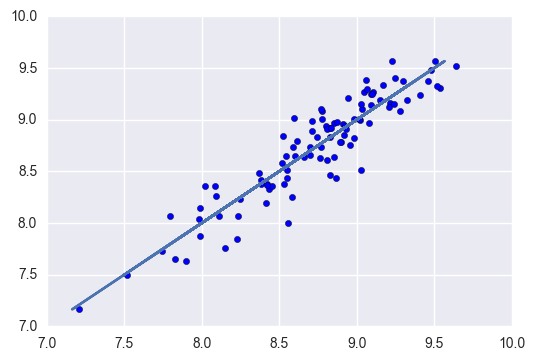

In [298]:
#this is linear regression for county_df

y = np.log(county_target)
X = np.log(county_data)

lm = linear_model.LinearRegression()

#regression for county_df
model = lm.fit(X,y)
predict = model.predict(X)
plt.scatter(predict,y)
plt.plot(y,y)
print model.coef_
print model.score(X,y)
print mean_squared_error(y,predict)
#plt.scatter(predict,predict-y)
delta = (y - pd.Series(predict))
county_df['Predict'] = pd.Series(predict)
county_df['Delta'] = delta

In [299]:
#these are top 20 counties in iowa to focus on
county_top12 = county_df.sort_values('Delta', ascending = False).head(12)
county_top12

,County,Sale (Dollars),Bottles Sold,Total_Cost,Stores_per_County,AvgSales,Avg_items_store,Per Capita Yearly Income,Housing Estimate,Population Estimate,Pop_per_store,Pop_house_ratio,house_pop_ratio,Predict,Delta
27,Delaware,41135.05,2824,27374.98,5,8227.010000,48.200000,26261,8027,17403,3480.600000,2.168058,0.461242,8.595272,0.419906
95,Winneshiek,71353.91,5199,47513.95,5,14270.782000,91.000000,25062,8838,20709,4141.800000,2.343177,0.426771,9.224635,0.341335
40,Hancock,17012.83,1390,11300.17,4,4253.207500,28.250000,25814,5315,10974,2743.500000,2.064722,0.484327,8.019988,0.335441
87,Union,53753.99,3854,35761.44,6,8958.998333,60.500000,23007,5904,12469,2078.166667,2.111958,0.473494,8.771108,0.329306
50,Jefferson,47390.46,3365,31559.00,4,11847.615000,78.500000,27593,7539,17555,4388.750000,2.328558,0.429450,9.056669,0.323213
41,Hardin,89503.47,6424,59577.71,13,6884.882308,44.615385,25153,8162,17367,1335.923077,2.127787,0.469972,8.526172,0.310911
46,Ida,35287.76,2346,23498.96,4,8821.940000,66.500000,25869,3433,7028,1757.000000,2.047189,0.488475,8.777915,0.307083
33,Floyd,56220.32,4221,37427.53,7,8031.474286,54.714286,24590,7523,15960,2280.000000,2.121494,0.471366,8.708781,0.282342
64,Mills,25460.83,2103,16961.78,6,4243.471667,29.333333,27101,6080,14844,2474.000000,2.441447,0.409593,8.085376,0.267761
79,Ringgold,9524.64,647,6341.85,3,3174.880000,25.000000,23324,2602,5068,1689.333333,1.947733,0.513418,7.797752,0.265273


[ 1.1022569  -0.23144295 -1.5712575  -0.69984226  0.3693271   1.27186241]
0.829544727135
0.241167057738


,City,County,Sale (Dollars),AvgSales,Bottles Sold,Total_Cost,Stores_per_City,Average_items_store,Population,Male,...,Consumption,MtoF,Male_pct,Female_pct,Houses,Predict,Delta,Liquor,Grocery,Other
14,WEST BURLINGTON,Des Moines,41516.21,10379.052500,2791,27610.79,4,47.250000,3051,1351,...,1.093157,0.794706,0.442806,0.557194,1820,8.588170,0.659375,0,1,3
20,GLENWOOD,Mills,18513.39,4628.347500,1467,12332.18,4,30.500000,5242,2487,...,3.573279,0.902722,0.474437,0.525563,2197,7.887552,0.552403,0,1,3
21,MALVERN,Mills,1168.80,1168.800000,198,778.86,1,8.000000,1118,565,...,5.646465,1.021700,0.505367,0.494633,462,6.578901,0.484832,0,0,1
6,AFTON,Union,1221.48,1221.480000,120,810.12,1,5.000000,842,382,...,7.016667,0.830435,0.453682,0.546318,455,6.644596,0.463223,0,0,1
9,CORWITH,Hancock,1955.66,1955.660000,115,1296.22,1,13.000000,269,147,...,2.339130,1.204918,0.546468,0.453532,150,7.115474,0.463009,0,0,1
11,BURLINGTON,Des Moines,160700.20,11478.585714,12909,107038.48,14,70.857143,25539,12149,...,1.978387,0.907319,0.475704,0.524296,15774,8.898701,0.449537,1,3,10
5,IOWA FALLS,Hardin,40589.79,8117.958000,2923,27024.35,5,50.000000,5173,2506,...,1.769757,0.939633,0.484438,0.515562,2704,8.554221,0.447613,1,3,1
8,BRITT,Hancock,7185.64,3592.820000,563,4767.93,2,24.000000,2026,942,...,3.598579,0.869004,0.464956,0.535044,1080,7.862215,0.324477,0,1,1
24,IDA GROVE,Ida,19113.21,6371.070000,1318,12725.75,3,44.333333,2121,981,...,1.609256,0.860526,0.462518,0.537482,1317,8.448949,0.310574,2,1,0
2,ELDORA,Hardin,13782.15,4594.050000,1081,9172.28,3,36.333333,2698,1405,...,2.495837,1.086620,0.520756,0.479244,1243,8.150938,0.281579,0,2,1


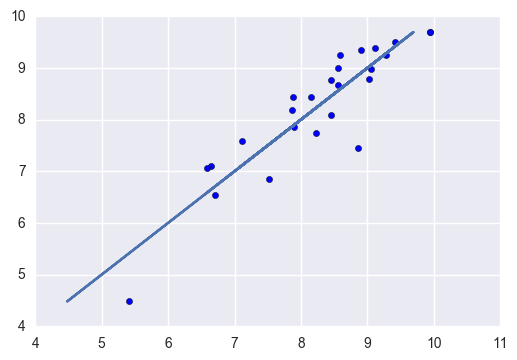

In [306]:
#building cities df to find which cities to target
city_df = train[train['Bottles Sold'] < 26].groupby(['City','County'])['Sale (Dollars)','Bottles Sold','Total_Cost'].sum()
city_df.reset_index(inplace = True)
county_top12_county = county_top12.iloc[:,0].to_frame()
city_df_top12 = pd.merge(city_df,county_top12_county,on='County')
city_df_top12
#36 cities
city_df_top12 = pd.merge(city_df_top12,stores_per_city)
city_df_top12 = pd.merge(city_df_top12,city_avgitems)
AvgSales = city_df_top12['Sale (Dollars)']/city_df_top12['Stores_per_City']
city_df_top12.insert(3,'AvgSales',AvgSales)
city_pop = pd.read_csv('../Resources/IA_Data_City_Master.csv')
city_df_top12 = pd.merge(city_df_top12,city_pop)
city_df_top12['Pop_per_store'] = city_df_top12['Population'] / city_df_top12['Stores_per_City']
city_df_top12['Consumption'] = city_df_top12['Population'] / city_df_top12['Bottles Sold']
city_df_top12.head()
#extrapolated the number of houses per city
houses_city = (city_df_top12['Population'] * (city_df_top12['Per Capita Income'] / city_df_top12['Household Income'] )).astype(int)
city_df_top12['MtoF'] = city_df_top12['Male'] / city_df_top12['Female']
city_df_top12['Male_pct'] = city_df_top12['Male'] / city_df_top12['Population']
city_df_top12['Female_pct'] = city_df_top12['Female'] / city_df_top12['Population']
city_df_top12['Houses'] = houses_city

#merging with store names
store_names = pd.read_csv('../Resources/IA_Data_Stores.csv')
store_names.head()
city_names = city_df_top12.iloc[:,0].to_frame()
city_merge_top12 = pd.merge(city_names,city_store)
city_store_merged = pd.merge(city_merge_top12, store_names)
store_type = []
liquor_list = []
grocery_list = []
other_list = []
for x in city_store_merged['Store Name']:
    if ('liquor' or 'spirits' or 'wine') in x.lower():
        store_type.append('Liquor')
        liquor_list.append(1)
        grocery_list.append(0)
        other_list.append(0)
    elif ('spirits') in x.lower():
        store_type.append('Liquor')
        liquor_list.append(1)
        grocery_list.append(0)
        other_list.append(0)
    elif ('wine') in x.lower():
        store_type.append('Liquor')
        liquor_list.append(1)
        grocery_list.append(0)
        other_list.append(0)
    elif ('beverage') in x.lower():
        store_type.append('Liquor')
        liquor_list.append(1)
        grocery_list.append(0)
        other_list.append(0)
    elif ('bottle') in x.lower():
        store_type.append('Liquor')  
        liquor_list.append(1)
        grocery_list.append(0)
        other_list.append(0)
    elif ('vineyard') in x.lower():
        store_type.append('Liquor')
        liquor_list.append(1)
        grocery_list.append(0)
        other_list.append(0)
    elif ('beer') in x.lower():
        store_type.append('Liquor')
        liquor_list.append(1)
        grocery_list.append(0)
        other_list.append(0)
    elif 'hy-vee' in x.lower():
        store_type.append('Grocery')
        liquor_list.append(0)
        grocery_list.append(1)
        other_list.append(0)
    elif 'fareway' in x.lower():
        store_type.append('Grocery')
        liquor_list.append(0)
        grocery_list.append(1)
        other_list.append(0)
    elif 'target'in x.lower():
        store_type.append('Grocery') 
        liquor_list.append(0)
        grocery_list.append(1)
        other_list.append(0)
    elif 'wal-mart' in x.lower():
        store_type.append('Grocery') 
        liquor_list.append(0)
        grocery_list.append(1)
        other_list.append(0)
    elif 'food' in x.lower():
        store_type.append('Grocery')
        liquor_list.append(0)
        grocery_list.append(1)
        other_list.append(0)
    elif 'supermarket' in x.lower():
        store_type.append('Grocery')           
        liquor_list.append(0)
        grocery_list.append(1)
        other_list.append(0)
    else:
        store_type.append('Other')
        liquor_list.append(0)
        grocery_list.append(0)
        other_list.append(1)
city_store_merged['Store Type'] = pd.Series(store_type)
city_store_merged['Liquor'] = pd.Series(liquor_list)
city_store_merged['Grocery'] = pd.Series(grocery_list)
city_store_merged['Other'] = pd.Series(other_list)
city_storetype = city_store_merged.groupby('City')[['Liquor','Grocery','Other']].sum()
city_storetype.reset_index(inplace = True)
city_reg = pd.merge(city_df_top12,city_storetype)
city_reg['Liquor_pct'] = city_reg['Liquor'] / city_reg['Stores_per_City']
#y = 'AvgSales'
#X Average_items_store, population, income, house value, median age
city_y = city_reg['AvgSales']
city_X = city_reg.iloc[:,[7,8,11,12,16,20]]
city_X


y = np.log(city_y)
X = np.log(city_X)

lm = linear_model.LinearRegression()

#regression for city
model_city = lm.fit(X,y)
predict_city = model_city.predict(X)
plt.scatter(predict_city,y)
plt.plot(y,y)
print model_city.coef_
print model_city.score(X,y)
print mean_squared_error(y,predict_city)
#plt.scatter(predict,predict-y)
delta = (y - pd.Series(predict_city))
city_df_top12['Predict'] = pd.Series(predict_city)
city_df_top12['Delta'] = delta
#county_df.sort_values('Delta',ascending = False)
#plt.scatter(y,predict-y)
city_df_top12.sort_values('Delta',ascending = False)
pd.merge(city_df_top12,city_storetype).sort_values('Delta',ascending = False)


[  1.12191223e+02  -9.94457391e-02  -1.09836515e+02  -3.11241340e-02
   1.53260272e+00   1.10203753e+04]
0.800483830423
3984986.77492


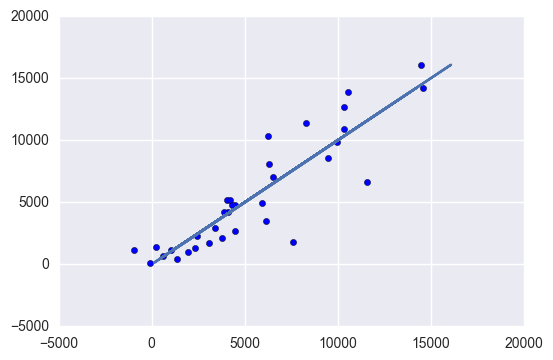

In [194]:
#regression for city - Lasso
y = city_y
X = city_X
lm = linear_model.Lasso()

model_cityL = lm.fit(X,y)
predict_cityL = model_cityL.predict(X)
plt.scatter(predict_cityL,y)
plt.plot(y,y)
print model_cityL.coef_
print model_cityL.score(X,y)
print mean_squared_error(y,predict_cityL)
#plt.scatter(predict,predict-y)
#delta = (y - pd.Series(predict_cityL))
#city_df_top12['Predict'] = pd.Series(predict_city)
#city_df_top12['Delta'] = delta
#county_df.sort_values('Delta',ascending = False)
#plt.scatter(y,predict-y)
#city_df_top12.sort_values('Delta',ascending = False)

## Plot your results

Again make sure that you record any valuable information. For example, in the tax scenario, did you find the sales from the first three months of the year to be a good predictor of the total sales for the year? Plot the predictions versus the true values and discuss the successes and limitations of your models

# Present the Results

Present your conclusions and results. If you have more than one interesting model feel free to include more than one along with a discussion. Use your work in this notebook to prepare your write-up.